In [1]:
# Import Dependencies
import seaborn as sns
import pandas as pd
import re
import numpy as np

In [2]:
# Read csv into pandas dataframe
wine_ratings_df = pd.read_csv("winemag-data.csv").drop(["Unnamed: 0"], axis=1)
wine_ratings_df

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [3]:
# Create list of titles to prepare for year parse.
titles_list = list(wine_ratings_df["title"].values)
titles_list

['Nicosia 2013 Vulkà Bianco  (Etna)',
 'Quinta dos Avidagos 2011 Avidagos Red (Douro)',
 'Rainstorm 2013 Pinot Gris (Willamette Valley)',
 'St. Julian 2013 Reserve Late Harvest Riesling (Lake Michigan Shore)',
 "Sweet Cheeks 2012 Vintner's Reserve Wild Child Block Pinot Noir (Willamette Valley)",
 'Tandem 2011 Ars In Vitro Tempranillo-Merlot (Navarra)',
 'Terre di Giurfo 2013 Belsito Frappato (Vittoria)',
 'Trimbach 2012 Gewurztraminer (Alsace)',
 'Heinz Eifel 2013 Shine Gewürztraminer (Rheinhessen)',
 'Jean-Baptiste Adam 2012 Les Natures Pinot Gris (Alsace)',
 'Kirkland Signature 2011 Mountain Cuvée Cabernet Sauvignon (Napa Valley)',
 'Leon Beyer 2012 Gewurztraminer (Alsace)',
 'Louis M. Martini 2012 Cabernet Sauvignon (Alexander Valley)',
 'Masseria Setteporte 2012 Rosso  (Etna)',
 'Mirassou 2012 Chardonnay (Central Coast)',
 'Richard Böcking 2013 Devon Riesling (Mosel)',
 'Felix Lavaque 2010 Felix Malbec (Cafayate)',
 'Gaucho Andino 2011 Winemaker Selection Malbec (Mendoza)',
 'Prad

In [4]:
# loop through titles and store years in list.
years = []
for i, title in enumerate(titles_list):
    try:
        year = re.search(r"\d{4}", title).group(0)
        #years.append(int(year))
        years.append(year)
    except:
        years.append(np.NaN)
print(years)

['2013', '2011', '2013', '2013', '2012', '2011', '2013', '2012', '2013', '2012', '2011', '2012', '2012', '2012', '2012', '2013', '2010', '2011', '2010', '2012', '2012', '2013', '2007', '2011', '2009', '2011', '2013', '2013', '2011', '2010', '2012', '2010', '2011', '2010', '2011', '2010', '2011', '2010', '2011', '2011', '2011', '2009', '2012', '2011', '2011', '2010', '2011', '2011', '2011', '2011', '2008', '2008', '2010', '2011', '2010', '2010', '2010', '2011', '2011', '2014', '2013', '2015', '2014', nan, '2015', '2015', '2015', '2013', '2014', nan, '2014', '2013', '2013', '2013', '2012', '2013', '2015', '2016', '2015', '2014', '2014', '2014', '2016', '2016', '2014', '2015', '2016', '2014', '2014', '2015', '2014', '2015', '2013', '2015', '2014', '2015', '2015', '2015', '2010', '2013', '2015', '2014', '2014', '2015', '2014', '2015', '2014', '2015', '2014', '2014', '2015', '2013', '2014', '2015', '2012', '2013', '2013', '2014', '2013', '2004', '2003', '2007', '2007', '2006', '2006', '2003

In [5]:
# Add year column to dataframe.
wine_ratings_df["year"] = years
wine_ratings_df

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),2013
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,2004
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,2013
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,2012


In [6]:
# create new dataframe with only the columns we want to keep.
selected_columns = ['country', 'designation', 'points', 'price', 'province',
       'region_1', 'taster_name', 'title', 'variety', 'winery', 'year']
wine_ratings_df = wine_ratings_df[selected_columns]

In [7]:
# Create function to display info for null values in dataframe.
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [8]:
missing_values_table(wine_ratings_df)

Your selected dataframe has 11 columns.
There are 8 columns that have missing values.


,Missing Values,% of Total Values
designation,37465,28.8
taster_name,26244,20.2
region_1,21247,16.3
price,8996,6.9
year,4609,3.5
country,63,0.0
province,63,0.0
variety,1,0.0


In [9]:
# Drop all rows with null values and renumber index.
wine_ratings_df = wine_ratings_df.dropna().reset_index(drop=True)
wine_ratings_df

,country,designation,points,price,province,region_1,taster_name,title,variety,winery,year
0,US,Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013
1,US,Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012
2,Spain,Ars In Vitro,87,15.0,Northern Spain,Navarra,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,2011
3,Italy,Belsito,87,16.0,Sicily & Sardinia,Vittoria,Kerin O’Keefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,2013
4,France,Les Natures,87,27.0,Alsace,Alsace,Roger Voss,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam,2012
...,...,...,...,...,...,...,...,...,...,...,...
51555,France,Brand Grand Cru,90,57.0,Alsace,Alsace,Roger Voss,Cave de Turckheim 2010 Brand Grand Cru Pinot G...,Pinot Gris,Cave de Turckheim,2010
51556,Italy,Sàgana Tenuta San Giacomo,90,40.0,Sicily & Sardinia,Sicilia,Kerin O’Keefe,Cusumano 2012 Sàgana Tenuta San Giacomo Nero d...,Nero d'Avola,Cusumano,2012
51557,France,Seppi Landmann Vallée Noble,90,28.0,Alsace,Alsace,Roger Voss,Domaine Rieflé-Landmann 2013 Seppi Landmann Va...,Pinot Gris,Domaine Rieflé-Landmann,2013
51558,France,Kritt,90,30.0,Alsace,Alsace,Roger Voss,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,2013


In [10]:
wine_ratings_df['country'].value_counts()

US           25436
France       10283
Italy         6769
Spain         4719
Argentina     2781
Australia     1398
Canada         174
Name: country, dtype: int64

In [11]:
wine_ratings_df['points'].value_counts().sort_index(ascending=False)

100       6
99       11
98       32
97       78
96      229
95      731
94     1957
93     3395
92     4713
91     5542
90     6649
89     5327
88     6861
87     5796
86     4046
85     2843
84     1728
83      865
82      455
81      174
80      122
Name: points, dtype: int64

In [12]:
wine_ratings_df.describe()

,points,price
count,51560.000000,51560.000000
mean,89.016408,39.338033
std,2.957617,36.147412
min,80.000000,4.000000
25%,87.000000,20.000000
50%,89.000000,30.000000
75%,91.000000,48.000000
max,100.000000,2013.000000


In [13]:
wine_ratings_df['province'].value_counts()

California              13744
Washington               5782
Oregon                   3721
Northern Spain           2999
Mendoza Province         2388
Burgundy                 2091
Tuscany                  2017
New York                 1738
Piedmont                 1616
Alsace                   1533
Loire Valley             1233
Bordeaux                 1112
Southwest France         1056
South Australia           916
Provence                  807
Catalonia                 726
Rhône Valley              706
Sicily & Sardinia         689
Northeastern Italy        657
Veneto                    590
Beaujolais                588
Champagne                 436
Central Italy             430
Southern Italy            417
Other                     393
Languedoc-Roussillon      391
Levante                   354
Central Spain             336
France Other              330
Lombardy                  291
Virginia                  222
Galicia                   194
Victoria                  166
Western Au

In [14]:
wine_ratings_df['variety'].value_counts()

Pinot Noir                  6616
Chardonnay                  4729
Red Blend                   4653
Cabernet Sauvignon          3111
Bordeaux-style Red Blend    2218
                            ... 
Trebbiano Spoletino            1
Catalanesca                    1
Sacy                           1
Barbera-Nebbiolo               1
Muskat Ottonel                 1
Name: variety, Length: 428, dtype: int64

In [15]:
wine_ratings_df['year'].value_counts()

2013    8784
2014    8312
2012    8140
2011    5042
2015    4762
2010    4292
2009    3045
2008    2140
2016    1713
2007    1609
2006    1293
2005     920
2004     429
1998     200
1999     152
2000     146
2003     142
2001     131
2002     128
1997      49
1996      24
1852      12
7200      10
1898       9
1995       8
1877       7
2017       6
1492       5
1868       4
1992       4
1840       3
1875       3
1821       2
1986       2
1994       2
1860       2
1985       2
1887       2
1927       2
1000       2
1929       2
1827       2
1993       1
1872       1
1988       1
1847       1
1752       1
1990       1
1882       1
1947       1
1919       1
1978       1
1991       1
1945       1
1989       1
1856       1
1904       1
1607       1
Name: year, dtype: int64

In [16]:
wine_ratings_df['taster_name'].value_counts()

Roger Voss            8114
Michael Schachner     7606
Virginie Boone        6641
Kerin O’Keefe         6625
Paul Gregutt          6341
Matt Kettmann         4478
Sean P. Sullivan      3363
Jim Gordon            2528
Joe Czerwinski        2275
Anna Lee C. Iijima    1656
Anne Krebiehl MW      1024
Lauren Buzzeo          417
Alexander Peartree     241
Susan Kostrzewa        150
Carrie Dykes            92
Fiona Adams              8
Christina Pickard        1
Name: taster_name, dtype: int64

In [17]:
wine_ratings_df.groupby(['country']).mean()

,points,price
country,,
Argentina,87.169004,26.973750
Australia,89.191702,42.188126
Canada,89.350575,40.017241
France,89.143149,39.240689
Italy,89.140789,46.124391
Spain,87.552236,31.362789
US,89.393773,40.241547


In [18]:
wine_ratings_df.groupby(['variety']).mean()

,points,price
variety,,
Abouriou,86.000000,45.000000
Aglianico,90.050000,44.275000
Airen,81.000000,9.500000
Albana,89.461538,19.384615
Albanello,86.000000,20.000000
...,...,...
White Riesling,92.000000,23.500000
Xarel-lo,85.944444,16.500000
Zibibbo,89.583333,33.416667


In [19]:
group_variety = wine_ratings_df.groupby(['variety']).mean(['points'])
group_variety.sort_values('points', ascending=False)

,points,price
variety,,
Cabernet-Shiraz,96.0,150.0
Tinta del Pais,95.0,47.5
Syrah-Petit Verdot,94.0,49.0
Riesling-Chardonnay,94.0,40.0
Garnacha-Cariñena,93.0,57.0
...,...,...
Viura-Verdejo,83.0,13.0
Malvasia-Viura,83.0,11.0
Picapoll,82.0,21.0


In [20]:
prov_ratings = wine_ratings_df.groupby(['province']).mean()
prov_ratings.sort_values('points', ascending=False)

,points,price
province,,
Champagne,92.417431,116.525229
Alsace,90.256360,33.298761
Piedmont,90.152228,64.082921
Tasmania,90.117647,50.294118
Burgundy,90.078431,64.517934
British Columbia,89.784946,35.666667
California,89.781432,44.308207
Andalucia,89.685185,40.111111
South Australia,89.652838,46.673581


In [21]:
wine_ratings_df.dtypes

country         object
designation     object
points           int64
price          float64
province        object
region_1        object
taster_name     object
title           object
variety         object
winery          object
year            object
dtype: object

In [22]:
# Convert year data type to integer.
wine_ratings_df["year"] = wine_ratings_df["year"].astype(int)
wine_ratings_df.head()

,country,designation,points,price,province,region_1,taster_name,title,variety,winery,year
0,US,Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013
1,US,Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012
2,Spain,Ars In Vitro,87,15.0,Northern Spain,Navarra,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,2011
3,Italy,Belsito,87,16.0,Sicily & Sardinia,Vittoria,Kerin O’Keefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,2013
4,France,Les Natures,87,27.0,Alsace,Alsace,Roger Voss,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam,2012


In [23]:
wine_ratings_df.dtypes

country         object
designation     object
points           int64
price          float64
province        object
region_1        object
taster_name     object
title           object
variety         object
winery          object
year             int32
dtype: object

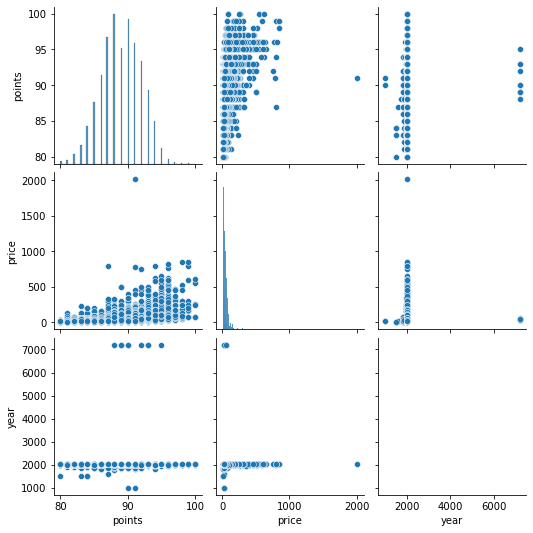

In [24]:
sns.pairplot(wine_ratings_df)

<AxesSubplot:xlabel='points', ylabel='country'>

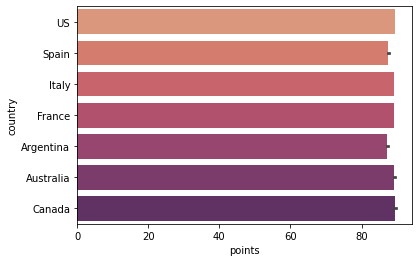

In [25]:
sns.barplot(x='points', y='country', data=wine_ratings_df, palette='flare')